# Indicators of Heavy Traffic on I-94 Interstate Highway

Our goal is to determine indicators of heavy traffic on I-94 interstate. It is notable to include the location is between Minneapolis and Saint Paul, and that traffic recorded was only westbound.

More information about the highway can be found [here.](https://en.wikipedia.org/wiki/Interstate_94)<br />

The Dataset can be downloaded from the [UCI Machine Learning Repository.](https://archive-beta.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)

The following tools will be used for the analysis:

- pandas: to read in the dataset, analyze the information and perform operations on columns and rows of the Dataframe
- matplotlib.pyplot: to plot graphs to help visualize information

We will start my importing pandas as the shortcut `pd` and read in the file.

In [1]:
import pandas as pd
interstate_traffic_volume = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

## Data Exploration

We will now use the pandas `Dataframe.info()` method to see information at a quick glance about the dataset.

In [2]:
interstate_traffic_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Matplotlib will now be imported to generate graphs to help visualize key elements of the dataset.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


To better visualize the traffic volume, we will generate a histogram based on the values of the `traffic_volume` column

Text(0.5, 1.0, 'Traffic Volume')

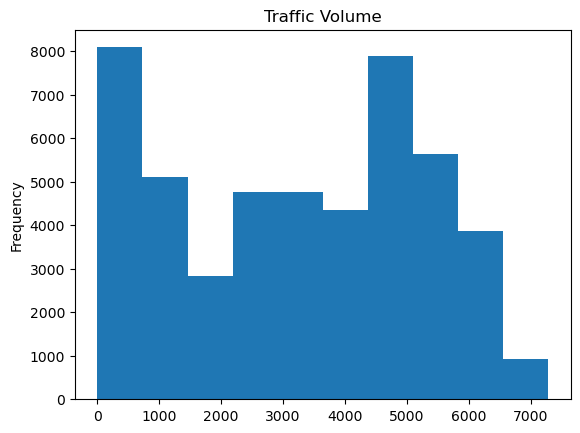

In [4]:
interstate_traffic_volume['traffic_volume'].plot.hist()
plt.title(label="Traffic Volume")

In [5]:
interstate_traffic_volume['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Analyzing the `traffic_volume` column

Based on the values above, we can say on average there are about 3000 cars on the road, with a minimum of 0 cars on the road and a maximum of 7280 cars recorded on the road at a given hour.

To better understand this data, we will compare night-time traffic versus day-time traffic to see if there is any influence of time on the data.

We start by diving the dataset into two parts:

- <b>Daytime data</b>: hours from 7 a.m to 7 p.m (12 hours)
- <b>Nighttime data</b>: hours from 7 p.m. to 7 a.m (12 hours)

Our data for time is stored as an object, as seen as follows from the dataframe.info() pandas method 
- `` 7   date_time            48204 non-null  object ``

To make this time easier to work with, we can convert the object into datetime so that it we may analyze it further with pandas, making use of a built in pandas function `pd.to_datetime()`

### Converting object to datetime for analysis

In [52]:
interstate_traffic_volume['date_time'] = pd.to_datetime(interstate_traffic_volume['date_time'], infer_datetime_format=True)

To verify the method worked we will take a look at the first five values of the `date_time` column

In [7]:
interstate_traffic_volume['date_time'].head(5)

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [8]:
interstate_traffic_volume['date_time'].value_counts(dropna=False)

2013-05-19 10:00:00    6
2013-04-18 22:00:00    6
2012-12-16 21:00:00    5
2012-10-25 15:00:00    5
2013-12-16 10:00:00    5
                      ..
2015-07-03 20:00:00    1
2015-07-03 21:00:00    1
2015-07-03 22:00:00    1
2015-07-03 23:00:00    1
2018-09-30 23:00:00    1
Name: date_time, Length: 40575, dtype: int64

We will now seperate the dataset into two dataframes, one for daytime (7 am to 7 pm) and one for nighttime (7 pm to 7 am). This the `Series.dt.hour` property for the dataset to get the hour, compare it to 7 am and 7 pm, and see if it fits within a specific time frame. 

From there, we seperate the rows corresponding to daytime, and the rows corresponding to nighttime into seperate dataframes.

In [9]:
daytime_rows = interstate_traffic_volume[(interstate_traffic_volume['date_time'].dt.hour >= 7) & (interstate_traffic_volume['date_time'].dt.hour < 19)]

In [10]:
nighttime_rows = interstate_traffic_volume[(interstate_traffic_volume['date_time'].dt.hour >= 19) | (interstate_traffic_volume['date_time'].dt.hour < 7)]

Using `series.info()` method for a quick glance for both dataframes we can see the following.

In [11]:
daytime_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [12]:
nighttime_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ MB


The total number of entries matches up to the original dataset entries, so we can go ahead and use matplotlib for further analyzing.

A histrogram will be used to show the `traffic_volume` column for day and night, and compared side to side. 

### Plotting Daytime and Nighttime histogram plot

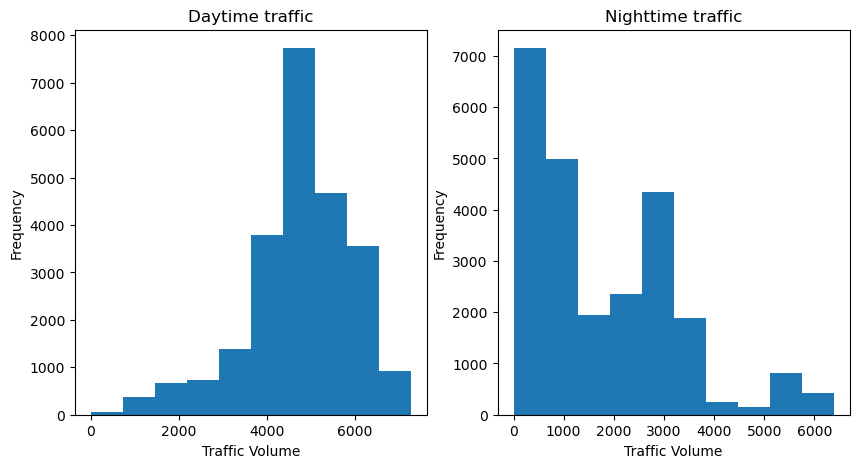

In [13]:
#DayTime histogram plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(daytime_rows['traffic_volume'],bins=10)
plt.title('Daytime traffic')
plt.xlabel(xlabel="Traffic Volume")
plt.ylabel(ylabel="Frequency")
    
#Night time histogram plot   
plt.subplot(1,2,2)
plt.hist(nighttime_rows['traffic_volume'],bins=10)
plt.title('Nighttime traffic')
plt.xlabel(xlabel="Traffic Volume")
plt.ylabel(ylabel="Frequency")
    
plt.show()

The daytime histogram is in the shape of a bell curve and it suggests as the day goes from 7 am to 7 pm, average traffic volume seems to be around the middle with a slight skewue towards the right, with an average of 4000-6500 cars.

For night-time traffic, it is in the shape of a decreasing exponential, which suggests most values lie closer to the start and therefore traffic volume is concentrated in this region.

The goal is to find indicators of heavy traffic, in which night-time traffic seems unsutable for this task, so we will focus on daytime traffic data going forward.

## Focusing on Day-time Data analysis

As stated above, because our goal is to find indicators of heavy traffic we will focus only on daytime data moving forward.

To analyze day-time traffic, we can start by looking at the following possible indicators:

- Month
- Day of Week
- Time of Day


### Month indicator

We will use the `DataFrame.groupby()` pandas method to average traffic volume for each month.

We will create a new column for each row that describes the month in which the data value was recorded.
To do this, we will use the `Series.dt.month` parameter from `daytime_rows['date_time']` column as the values are stored as datetime64.

In [14]:
daytime_rows['month'] = daytime_rows['date_time'].dt.month
#looking at our data
daytime_rows['month'].describe()

C:\Users\rjona\AppData\Local\Temp\ipykernel_21916\482928309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_rows['month'] = daytime_rows['date_time'].dt.month


count    23877.000000
mean         6.522218
std          3.407585
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64

Now we want to average out traffic for each month, to do this, we will use the method `dataframe.groupby('month').mean()` on our daytime dataframe, and plot the result as a line plot.

In [15]:
by_month = daytime_rows.groupby('month').mean()
by_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            12 non-null     float64
 1   rain_1h         12 non-null     float64
 2   snow_1h         12 non-null     float64
 3   clouds_all      12 non-null     float64
 4   traffic_volume  12 non-null     float64
dtypes: float64(5)
memory usage: 576.0 bytes


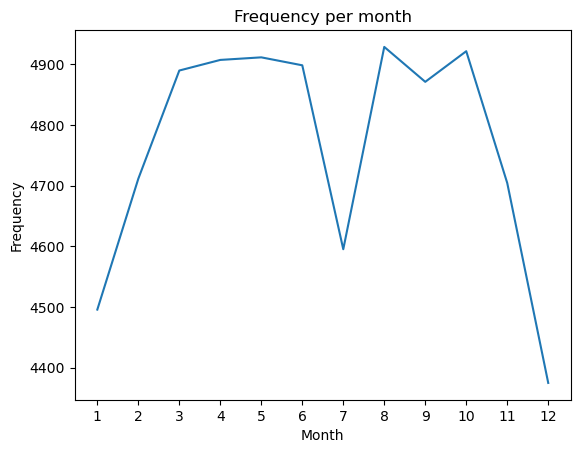

In [16]:
plt.plot(by_month['traffic_volume'])
plt.title(label="Frequency per month")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Month')
plt.ylabel("Frequency")
plt.show()

The graph shows that during the months from December to February traffic volume is quite substantially less than months from March to October. 

We will now look at seeing if the day of the week affects traffic.

### Day of the week indicator

In [17]:
daytime_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.0+ MB


To see whether the day of the week is an indicator of heavy traffic, we can average out the traffic volumes for each day of the week, as we did above for the month.

We will first start by adding a column to the `daytime_rows` dataframe to indicate the day, which will help for averaging out the traffic volumes after.

In [18]:
daytime_rows['dayofweek'] = daytime_rows['date_time'].dt.dayofweek 

#Now to find daily averages using .groupby method
daytime_avg = daytime_rows.groupby('dayofweek').mean()


C:\Users\rjona\AppData\Local\Temp\ipykernel_21916\1285117386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_rows['dayofweek'] = daytime_rows['date_time'].dt.dayofweek


And again, we will visualize this data with a line graph.

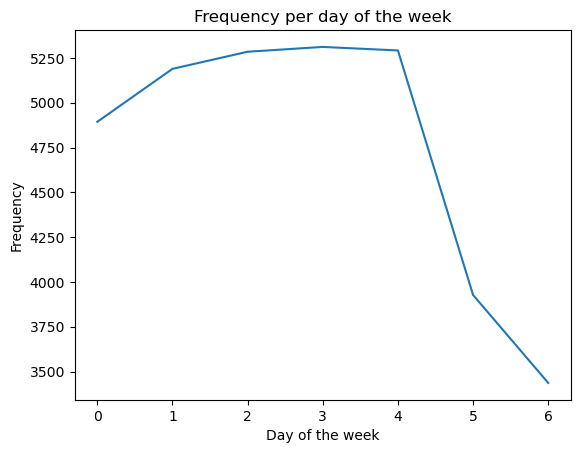

In [19]:
plt.plot(daytime_avg['traffic_volume'])
plt.title("Frequency per day of the week")
plt.xlabel('Day of the week')
plt.ylabel("Frequency")
plt.show()

It is clear to note from our generated line graph that from Monday to Friday there is heavy traffic is present, and that it falls of heavily during the weekend.

While this may be common knowledge, it is only with data analysis that we are able to empirically show this is the case. So following this, when looking at seeing what time of the day there is a greater frequency, we will <b>seperate business days from weekends.</b>

### Time of day Indicator

To start, because traffic volume is significally heavier on business days compared to wekeends, we will seperate those days and have average values for business and weekend.

If we included all values in our analysis, weekend values will drag down business days substantially, and with our data seperated we can better understand and analyze the outputs.

To start, We will start by seperated the values similar to what we did above. By using `.dt.hour` on our datetime column for our hourly values and grabbing seperate rows for day of the week.

We can then use `Dataframe.gorupby()` to average out the values for the business days and weekend.

In [20]:
daytime_rows['hour'] = daytime_rows['date_time'].dt.hour
bussiness_days = daytime_rows.copy()[daytime_rows['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_rows.copy()[daytime_rows['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

#printing hourly values for business days and weekend days
print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


C:\Users\rjona\AppData\Local\Temp\ipykernel_21916\1028910776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_rows['hour'] = daytime_rows['date_time'].dt.hour


It is clear above traffic is different on both sets of data, but to better visualize this we will use matplotlib.pyplot line plots for each on the same graph.

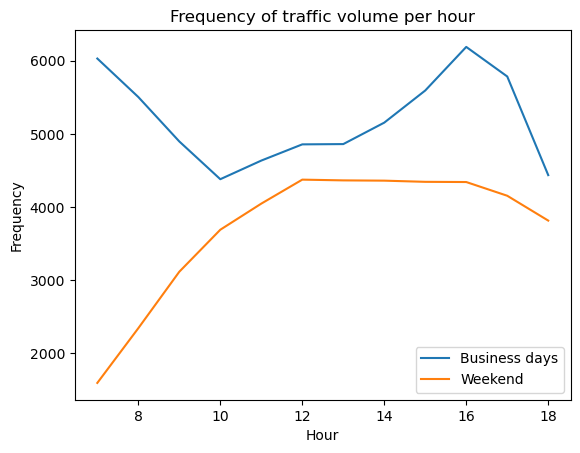

In [21]:
plt.plot(by_hour_business['traffic_volume'], label = "Business days")
plt.plot(by_hour_weekend['traffic_volume'], label = "Weekend")
plt.legend()
plt.xlabel(xlabel ="Hour")
plt.ylabel(ylabel="Frequency")
plt.title(label = "Frequency of traffic volume per hour")
plt.show()

In the graphs above we see from at 7 a.m. and 4 p.m. for the business days the highest frequency value reached, about 6000, whereas the highest for a weekend day is about 4000.

The values for business days seem to decline from 7-10 a.m., and from 4-7 p.m., which is not seen in our weekday line plot.
For our weekday line plot, it more linear and seems to stabilize at around 12pm up until 7 p.m., which is quite the contrast to business days.

### Summarizing time indicators for heavy traffic

It is clear that for each indicator, we needed to take a deeper look into the data to better understand traffic volume. For each data piece explored, once analyzed helped determine the next best step into further analysis, to get a complete picture of what is occuring.

It is clear that traffic volume is at it's peak at 7 a.m. and 4 p.m. on business days, from Monday to Friday and from March to October. We have looked at the data and used matplotplib and pandas to analyse such, providing much greater insight and knowledge.

## Weather Indicators

We will now look to see if weather is a good indicator for traffic volume. 
The dataset provides us with the following columns that are useful about weather:

- `temp`
- `rain_1h`
- `snow_1h`
- `clouds_all` 
-`weather_main`
- `weather_description`

Of those columns, we can use the numerical ones to find correlation values between `traffic_volume` and weather.
We will use the `DataFrame.info()` pandas as we did in the beginning to find out.

In [22]:
daytime_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  dayofweek            23877 non-null  int64         
 11  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.4+ MB


### Exploring numerical weather columns

From those columns about weather, `temp`, `rain_1h`, `snow_1h` and `clouds_all` are the numerical columns. To find a correlation between `traffic_volume` and the columns listed, we will use the pandas method `.corr()` to compute pairwise correlation of columns and save the values to a new dataframe, temp_corr. We can input the specific columns we want as a list beside the method to get specific results.

In [23]:
temp_corr = daytime_rows.corr()[['traffic_volume','temp','rain_1h','snow_1h','clouds_all']]

In [24]:
#viewing the results
temp_corr

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
temp,0.128317,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.003697,0.010815,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.032932,-0.135519,0.004993,0.027721,1.000000
traffic_volume,1.000000,0.128317,0.003697,0.001265,-0.032932
month,-0.022337,0.222072,0.001176,0.026768,0.000595
dayofweek,-0.416453,0.000188,-0.009683,-0.008814,-0.041980
hour,0.172704,0.162691,0.008279,0.003923,0.023685


Viewing the results above, we see the highest correlation value of `traffic_volume` with the column of `temp`, and while the correlation coeffiecient `0.130299` is considered to be a negligible correlation, we will still explore it further.

We will plot a scatter plot for this weather column and traffic volume using matplotlib.pylplot.

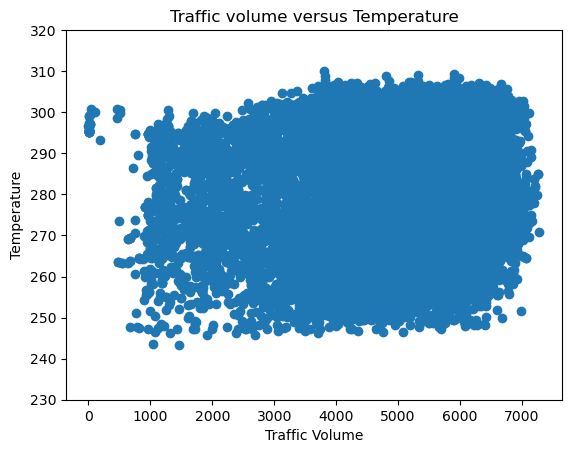

In [39]:
plt.scatter(daytime_rows['traffic_volume'],daytime_rows['temp'])
plt.title(label="Traffic volume versus Temperature")
plt.xlabel(xlabel="Traffic Volume")
plt.ylabel(ylabel="Temperature")
plt.ylim(230,320)
plt.show()

Examining the scatter plot, there doesn't seem to be any reliable indicator of heavy traffic between the two columns. Like noted above, the correlation value between the columns is `0.130299`, which is considered a negligible pearson correlation coefficient.

Not finding the weather columns to be reliable indicators of traffic, we will look at the categorial weather related columns, `weather_main` and `weather_description`.

### Exploring categorial weather related columns

To see if categorial weather related columns could produce more reliable indicators of heavy traffic, like stated above we will dive into the following columns.
 - `weather_main`
 -` weather_description`
 
We will calculate average traffic volume associated with the two columns using pandas methods `.groupby()` and performing `.mean()` again using daytime values associated with traffic volume.

In [26]:
by_weather_main = daytime_rows.groupby('weather_main').mean()
by_weather_description = daytime_rows.groupby('weather_description').mean()

Taking a look at the first five rows for each

In [44]:
by_weather_main.head(5)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626


In [45]:
by_weather_description.head(5)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.0,75.000000,4211.000000,7.000000,2.000000,14.000000
Sky is Clear,293.232549,0.000000,0.0,0.000000,4919.009390,7.557512,2.895540,12.453052
broken clouds,282.372927,0.000000,0.0,72.635875,4824.130326,6.675260,2.998210,12.811314
drizzle,283.573777,0.145072,0.0,88.589928,4737.330935,7.244604,3.028777,11.697842
few clouds,284.272965,0.000000,0.0,19.391951,4839.818023,6.159230,2.977253,12.633421


Interestingly, we at a glance we see different traffic volume values depending on the weather condition. To explore this further, bar plots will be plotted to provide visualization.

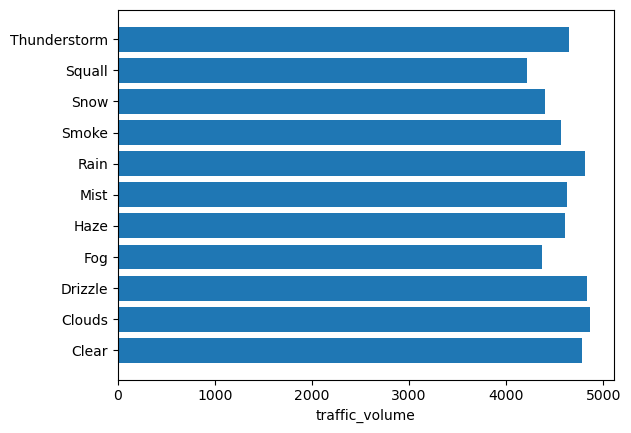

In [51]:
plt.barh(by_weather_main.index,by_weather_main['traffic_volume'])
plt.xlabel(xlabel="traffic_volume")
plt.show()

Analyzing the bar plot, there doesn't seem to be any value that exceeds 5000 cars. Most values seem to be in the range of 4000-5000, with not one being a clear indicator of traffic. 

We will plot the other weather columns to see if there is a more clear distinction.

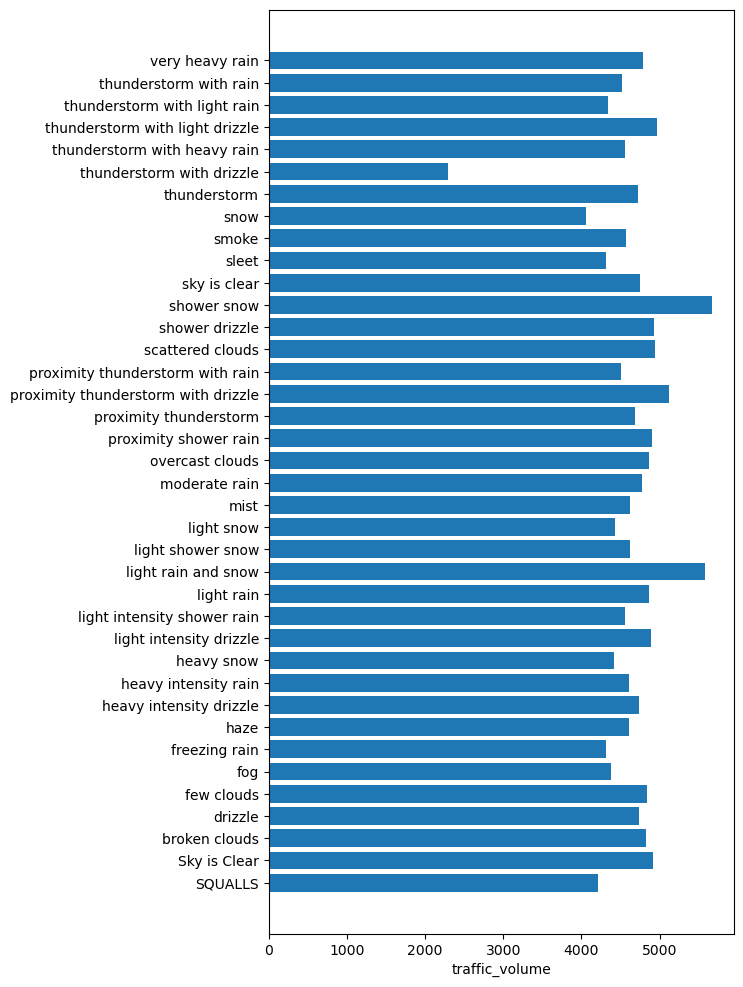

In [50]:
plt.figure(figsize=(6,12))
plt.barh(by_weather_description.index,by_weather_description['traffic_volume'])
plt.xlabel(xlabel="traffic_volume")
plt.show()

In this bar graph, it is clear two indicators that correlate with increased traffic volume, `shower snow` and `light rain and snow` in which for both, over 5000 cars were recorded with the corresponding weather condition.



## Conclusion

In this project I set out to find heavy indicators of traffic on the I-94 Interstate highway using `pandas` and `matplotlib.pyplot` to plot data. 

Through my analysis, we looked at time indicators and weather indicators to see if heavy traffic was affected.

### Time indicators
Traffic was heavier during March to October, than the colder months of November-February. 

Traffic was also heavier on business days versus weekends.
The times of 7 a.m. and 4 p.m. where the busiest for business days, indicating rush hour times.

### Weather Indicators
We found `shower snow` and `light rain and snow` indicators to be good indicators of heavy traffic.

It is important to note none of these are causes of heavy traffic, and only that they correlate with times of heavy traffic.